<a href="https://colab.research.google.com/github/sarthakkaushik/Diploma-Program-in-ML-and-AI/blob/main/Image_classification_using_ANN_vs_CNN_vs_VGG16_architecture_on_CIFAR10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

#Loading the data set

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
 print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
 

X_train shape (50000, 32, 32, 3)
X_test shape (10000, 32, 32, 3)


In [4]:
 print('y_train shape',y_train.shape)
 print('y_test shape',y_test.shape)
 

y_train shape (50000, 1)
y_test shape (10000, 1)


In [5]:
y_train[:5] # its a 2D array, for classification it would be easy to operate on 1d array, hence we will convert it in 1D array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train=y_train.reshape(-1,) #-1 beacuse if we dont want to change the 1st dimension, 2nd dim we want to flatten it hence we will leave it blank
print(y_train[:5])
y_test=y_test.reshape(-1,)
print(y_test[:5])

[6 9 9 4 1]
[3 8 8 0 6]


In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

#Plotting some of the images

In [8]:
def plotsample(X,y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

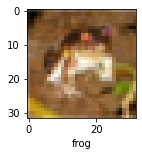

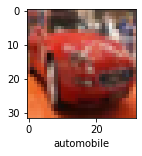

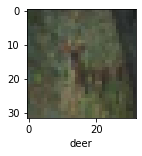

In [9]:
plotsample(X_train,y_train,0)
plotsample(X_train,y_train,5)
plotsample(X_train,y_train,10)


Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

**Normalizing the training data**

In [10]:
X_train=X_train/255.0
X_test=X_test/255.0

**Case I:** Build artificial Neural Netwok

In [11]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(1000, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])


In [12]:
ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )

In [13]:
ann.fit(X_train,y_train,epochs=10,verbose=2,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 - 10s - loss: 1.8612 - accuracy: 0.3278 - val_loss: 1.6914 - val_accuracy: 0.3976 - 10s/epoch - 6ms/step
Epoch 2/10
1563/1563 - 7s - loss: 1.6493 - accuracy: 0.4056 - val_loss: 1.6856 - val_accuracy: 0.3938 - 7s/epoch - 4ms/step
Epoch 3/10
1563/1563 - 7s - loss: 1.5752 - accuracy: 0.4375 - val_loss: 1.5820 - val_accuracy: 0.4308 - 7s/epoch - 5ms/step
Epoch 4/10
1563/1563 - 7s - loss: 1.5271 - accuracy: 0.4550 - val_loss: 1.5119 - val_accuracy: 0.4576 - 7s/epoch - 5ms/step
Epoch 5/10
1563/1563 - 7s - loss: 1.4878 - accuracy: 0.4682 - val_loss: 1.5079 - val_accuracy: 0.4567 - 7s/epoch - 5ms/step
Epoch 6/10
1563/1563 - 7s - loss: 1.4550 - accuracy: 0.4798 - val_loss: 1.4696 - val_accuracy: 0.4767 - 7s/epoch - 4ms/step
Epoch 7/10
1563/1563 - 7s - loss: 1.4249 - accuracy: 0.4911 - val_loss: 1.4694 - val_accuracy: 0.4834 - 7s/epoch - 4ms/step
Epoch 8/10
1563/1563 - 7s - loss: 1.4090 - accuracy: 0.4950 - val_loss: 1.4645 - val_accuracy: 0.4806 - 7s/epoch - 5ms/step
Epoch 

In [14]:
score=ann.evaluate(X_test,y_test,verbose=0)
print('Test Loss', score[0])
print('Train Loss', score[1])


Test Loss 1.455464482307434
Train Loss 0.491100013256073


**You can see that at the end of 10 epochs, accuracy is at around 47%**

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(elements) for elements in y_pred]

print('Classification Report: \n', classification_report(y_test,y_pred_classes))


Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.59      0.56      1000
           1       0.59      0.65      0.62      1000
           2       0.36      0.39      0.38      1000
           3       0.34      0.34      0.34      1000
           4       0.47      0.32      0.38      1000
           5       0.39      0.41      0.40      1000
           6       0.55      0.49      0.52      1000
           7       0.46      0.64      0.54      1000
           8       0.68      0.56      0.61      1000
           9       0.59      0.52      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



**Case-2 :** Lets see the CNN performance on Image data

In [16]:
cnn=models.Sequential([
                       
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
                       layers.MaxPooling2D((2,2)),

                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
                       layers.MaxPooling2D((2,2)),
                       layers.Dropout(0.25),

                       layers.Flatten(),
                       layers.Dense(64,activation='relu'),
                       layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )

In [18]:
cnn.fit(X_train,y_train,epochs=10,verbose=2,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 - 16s - loss: 1.5261 - accuracy: 0.4517 - val_loss: 1.2524 - val_accuracy: 0.5526 - 16s/epoch - 10ms/step
Epoch 2/10
1563/1563 - 8s - loss: 1.2223 - accuracy: 0.5668 - val_loss: 1.1124 - val_accuracy: 0.6109 - 8s/epoch - 5ms/step
Epoch 3/10
1563/1563 - 7s - loss: 1.1142 - accuracy: 0.6106 - val_loss: 1.0667 - val_accuracy: 0.6272 - 7s/epoch - 5ms/step
Epoch 4/10
1563/1563 - 8s - loss: 1.0429 - accuracy: 0.6355 - val_loss: 1.0005 - val_accuracy: 0.6527 - 8s/epoch - 5ms/step
Epoch 5/10
1563/1563 - 8s - loss: 0.9882 - accuracy: 0.6563 - val_loss: 0.9782 - val_accuracy: 0.6596 - 8s/epoch - 5ms/step
Epoch 6/10
1563/1563 - 8s - loss: 0.9429 - accuracy: 0.6691 - val_loss: 0.9505 - val_accuracy: 0.6687 - 8s/epoch - 5ms/step
Epoch 7/10
1563/1563 - 8s - loss: 0.9059 - accuracy: 0.6817 - val_loss: 0.9234 - val_accuracy: 0.6790 - 8s/epoch - 5ms/step
Epoch 8/10
1563/1563 - 8s - loss: 0.8746 - accuracy: 0.6932 - val_loss: 0.9096 - val_accuracy: 0.6796 - 8s/epoch - 5ms/step
Epoch

In [19]:
score=ann.evaluate(X_test,y_test,verbose=0)
print('Test Loss', score[0])
print('Train Loss', score[1])


Test Loss 1.455464482307434
Train Loss 0.491100013256073


In [20]:
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(elements) for elements in y_pred]

print('Classification Report: \n', classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.59      0.56      1000
           1       0.59      0.65      0.62      1000
           2       0.36      0.39      0.38      1000
           3       0.34      0.34      0.34      1000
           4       0.47      0.32      0.38      1000
           5       0.39      0.41      0.40      1000
           6       0.55      0.49      0.52      1000
           7       0.46      0.64      0.54      1000
           8       0.68      0.56      0.61      1000
           9       0.59      0.52      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



#Using Tranfer Learning : VGG16

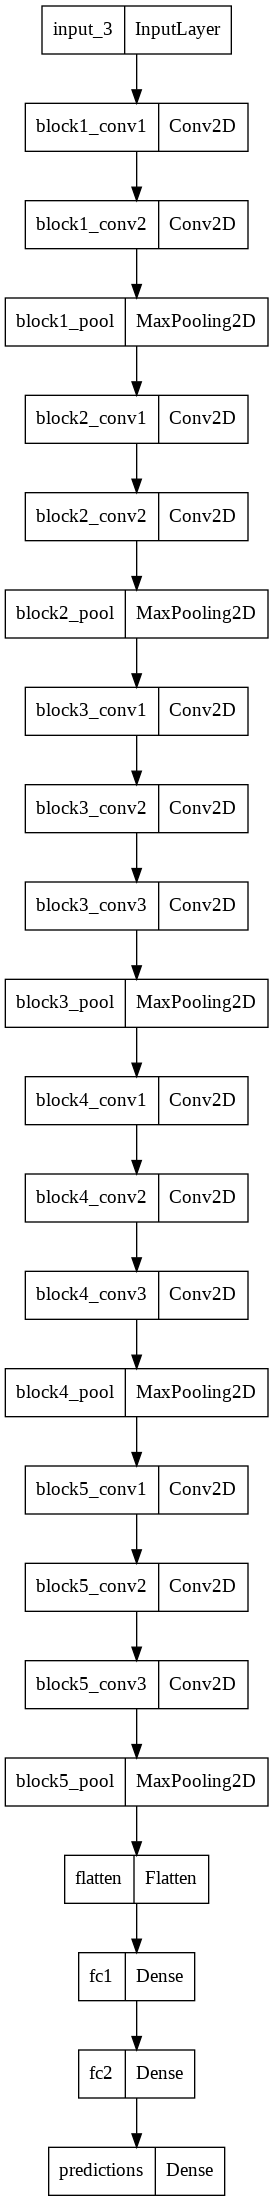

In [34]:
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import  plot_model
model = VGG16()
plot_model(model)

In [35]:
# VGG-16 model summary
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

The following code section will cut the VGG model after the final convolutional layer:

In [36]:
base_model_VGG16=VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))

In [37]:
base_model_VGG16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [38]:
#Dont train the the exisiting  weights
for layers in base_model_VGG16.layers:

  layers.trainable=False

In [39]:
#create vectore representation for our data using VGG16
X_train_vgg_output=base_model_VGG16.predict(X_train,verbose=2)
X_test_vgg_output=base_model_VGG16.predict(X_test,verbose=2)


1563/1563 - 23s - 23s/epoch - 14ms/step
313/313 - 5s - 5s/epoch - 15ms/step


In [40]:
print ('shape of X_train_vegg_output: ',X_train_vgg_output.shape)
print ('shape of X_test_vegg_output: ',X_test_vgg_output.shape)

shape of X_train_vegg_output:  (50000, 1, 1, 512)
shape of X_test_vegg_output:  (10000, 1, 1, 512)


In [41]:
X_train[0].shape

(32, 32, 3)

In [42]:
X_test_vgg_output[0].shape

(1, 1, 512)

In [43]:
#Flatten the output
X_train_new_1 = np.reshape(X_train_vgg_output,(50000,1*1*512))
X_test_new_1=np.reshape(X_test_vgg_output,(10000,512))
print('New shape train:', X_train_new_1.shape)
print('New_shape_test',X_test_new_1.shape)




New shape train: (50000, 512)
New_shape_test (10000, 512)


In [47]:
#Lets train a new ann model on our output feature form VGG16
ann_new_model2 = models.Sequential([
        # layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(1000, activation='relu', input_dim=1*1*512),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(500, activation='relu'),
        keras.layers.Dense(10, activation='softmax')    
    ])


In [48]:
ann_new_model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
ann_history=ann_new_model2.fit(X_train_new_1,y_train,epochs=10,verbose=2,validation_data=(X_test_new_1,y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 7s - loss: 1.4321 - accuracy: 0.4941 - val_loss: 1.2427 - val_accuracy: 0.5620 - 7s/epoch - 4ms/step
Epoch 2/10
1563/1563 - 6s - loss: 1.2755 - accuracy: 0.5499 - val_loss: 1.2077 - val_accuracy: 0.5736 - 6s/epoch - 4ms/step
Epoch 3/10
1563/1563 - 6s - loss: 1.2188 - accuracy: 0.5693 - val_loss: 1.1812 - val_accuracy: 0.5909 - 6s/epoch - 4ms/step
Epoch 4/10
1563/1563 - 6s - loss: 1.1835 - accuracy: 0.5851 - val_loss: 1.1613 - val_accuracy: 0.5898 - 6s/epoch - 4ms/step
Epoch 5/10
1563/1563 - 6s - loss: 1.1524 - accuracy: 0.5971 - val_loss: 1.1372 - val_accuracy: 0.6054 - 6s/epoch - 4ms/step
Epoch 6/10
1563/1563 - 6s - loss: 1.1254 - accuracy: 0.6036 - val_loss: 1.1353 - val_accuracy: 0.6025 - 6s/epoch - 4ms/step
Epoch 7/10
1563/1563 - 6s - loss: 1.1035 - accuracy: 0.6114 - val_loss: 1.1219 - val_accuracy: 0.6102 - 6s/epoch - 4ms/step
Epoch 8/10
1563/1563 - 6s - loss: 1.0788 - accuracy: 0.6170 - val_loss: 1.1128 - val_accuracy: 0.6100 - 6s/epoch - 4ms/step
Epoch 9/10
1563/156

In [53]:
# #Lets train a new ann model -network withh VGG16 as a part NN layer

#tf.keras.backend.clear_session() - this will clear out session in the notebook

network= models.Sequential()
network.add(base_model_VGG16)
# network.add(Flatten())

network.add(Dense(1000,activation='relu'))
network.add(Dropout(0.3))
network.add(Dense(500,activation='relu'))
network.add(Dropout(0.3))
network.add(Dense(128,activation='relu'))
network.add(Dropout(0.3))
network.add(Dense(64,activation='relu'))
network.add(Dropout(0.3))

network.add(Dense(10, activation='softmax'))

In [54]:
network.summary()
# network.compile(optimizer='adam',
#             loss='sparse_categorical_crossentropy',
#             metrics=['accuracy']
#             )
network.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 dense_16 (Dense)            (None, 1, 1, 1000)        513000    
                                                                 
 dropout_8 (Dropout)         (None, 1, 1, 1000)        0         
                                                                 
 dense_17 (Dense)            (None, 1, 1, 500)         500500    
                                                                 
 dropout_9 (Dropout)         (None, 1, 1, 500)         0         
                                                                 
 dense_18 (Dense)            (None, 1, 1, 128)         64128     
                                                                 
 dropout_10 (Dropout)        (None, 1, 1, 128)        

In [55]:
history=network.fit(X_train,y_train,epochs=10,verbose=2,validation_data=(X_test,y_test))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 - 40s - loss: 1.6258 - accuracy: 0.1106 - val_loss: 1.3393 - val_accuracy: 0.1138 - 40s/epoch - 25ms/step
Epoch 2/10
1563/1563 - 38s - loss: 1.3942 - accuracy: 0.1134 - val_loss: 1.2908 - val_accuracy: 0.1148 - 38s/epoch - 24ms/step
Epoch 3/10
1563/1563 - 38s - loss: 1.3215 - accuracy: 0.1140 - val_loss: 1.2450 - val_accuracy: 0.1152 - 38s/epoch - 24ms/step
Epoch 4/10
1563/1563 - 38s - loss: 1.2752 - accuracy: 0.1148 - val_loss: 1.2359 - val_accuracy: 0.1154 - 38s/epoch - 24ms/step
Epoch 5/10
1563/1563 - 38s - loss: 1.2469 - accuracy: 0.1146 - val_loss: 1.1825 - val_accuracy: 0.1159 - 38s/epoch - 24ms/step
Epoch 6/10
1563/1563 - 38s - loss: 1.2151 - accuracy: 0.1155 - val_loss: 1.2008 - val_accuracy: 0.1153 - 38s/epoch - 24ms/step
Epoch 7/10
1563/1563 - 38s - loss: 1.1915 - accuracy: 0.1155 - val_loss: 1.1717 - val_accuracy: 0.1160 - 38s/epoch - 24ms/step
Epoch 8/10
1563/1563 - 38s - loss: 1.1630 - accuracy: 0.1156 - val_loss: 1.1648 - val_accuracy: 0.1164 - 38s/epoch - 24ms/

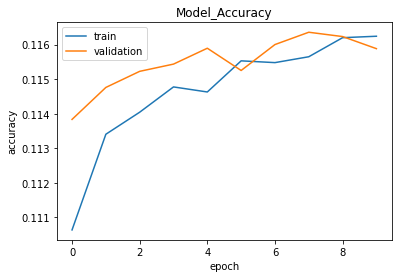

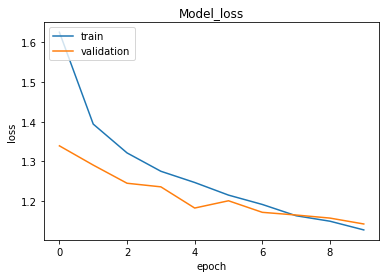

In [56]:
#Summary history of accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='upper left')
plt.show()

#Summary history of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc='upper left')
plt.show()


In [ ]:
X_train_new_1.shape